In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score


DATA

In [6]:
df= pd.read_csv('/content/drive/MyDrive/emotions.csv')
df = df.copy()
encode = ({'NEUTRAL': 0, 'POSITIVE': 1, 'NEGATIVE': 2} )

df['label'] = df['label'].replace(encode)

y = df['label'].copy()
x = df.drop('label', axis=1).copy()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 4)

In [19]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266 entries, 0 to 1265
Columns: 2548 entries, # mean_0_a to fft_749_b
dtypes: float64(2547), object(1)
memory usage: 24.6+ MB


In [15]:
print(x_test.shape)

(254, 2548)


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266 entries, 0 to 1265
Columns: 2549 entries, # mean_0_a to label
dtypes: float64(2548), object(1)
memory usage: 24.6+ MB


GRU model

In [7]:
inputs = tf.keras.Input(shape=(x_train.shape[1],))
expand_dims = tf.expand_dims(inputs, axis=2)
gru = tf.keras.layers.GRU(256, return_sequences=True)(expand_dims)
flatten = tf.keras.layers.Flatten()(gru)
outputs = tf.keras.layers.Dense(3, activation='softmax')(flatten)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [8]:
history = model.fit( x_train,  y_train, validation_data= (x_test, y_test), epochs=20)


Epoch 1/20
54/54 [==============================] - 13s 123ms/step - loss: 26.9138 - accuracy: 0.8235 - val_loss: 9.1336 - val_accuracy: 0.8595
Epoch 2/20
54/54 [==============================] - 6s 115ms/step - loss: 6.1623 - accuracy: 0.9255 - val_loss: 3.8046 - val_accuracy: 0.9251
Epoch 3/20
54/54 [==============================] - 6s 114ms/step - loss: 3.8957 - accuracy: 0.9396 - val_loss: 2.2477 - val_accuracy: 0.9532
Epoch 4/20
54/54 [==============================] - 6s 114ms/step - loss: 1.4624 - accuracy: 0.9648 - val_loss: 0.9143 - val_accuracy: 0.9742
Epoch 5/20
54/54 [==============================] - 6s 118ms/step - loss: 0.2207 - accuracy: 0.9930 - val_loss: 2.3495 - val_accuracy: 0.9672
Epoch 6/20
54/54 [==============================] - 6s 114ms/step - loss: 0.2784 - accuracy: 0.9883 - val_loss: 4.9859 - val_accuracy: 0.9063
Epoch 7/20
54/54 [==============================] - 6s 114ms/step - loss: 0.4235 - accuracy: 0.9906 - val_loss: 1.3434 - val_accuracy: 0.9742
Epoc

Evaluation

In [9]:
score, acc = model.evaluate(x_test, y_test)

14/14 [==============================] - 1s 52ms/step - loss: 3.0367 - accuracy: 0.9719


In [29]:
score, acc = model.evaluate(x_train, y_train)


54/54 [==============================] - 5s 98ms/step - loss: 0.0000e+00 - accuracy: 1.0000


In [28]:
predict = model.predict(x_test)
predicted_classes = np.argmax(predict,axis=1)
print('the predicted class:',predicted_classes[0])
print('the actual class:', y_test[1503])

the predicted class: 1
the actual class: 1


Confusion Matrix
[[150   3   0]
 [  0 138   4]
 [  0   1 131]]


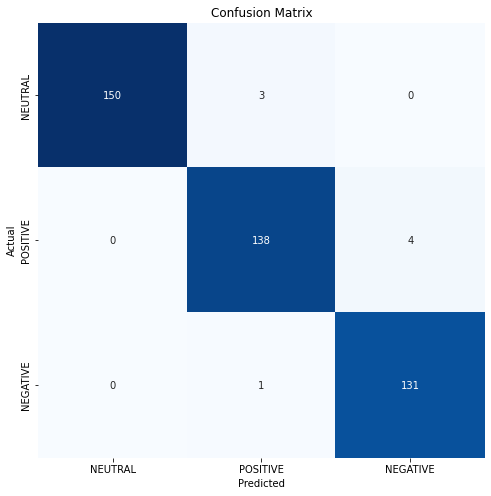

In [16]:
# encode = ({'NEUTRAL': 0, 'POSITIVE': 1, 'NEGATIVE': 2} )

y_pred = np.argmax(model.predict(x_test),axis=1)
# y_test = np.argmax(y_test,axis=1)

cm=confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(cm)


plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xticks(np.arange(3) + 0.5, encode.keys())
plt.yticks(np.arange(3) + 0.5, encode.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [17]:
clr = classification_report(y_test, y_pred, target_names=encode.keys())
print("Classification Report:\n----------------------\n", clr)

Classification Report:
----------------------
               precision    recall  f1-score   support

     NEUTRAL       1.00      0.98      0.99       153
    POSITIVE       0.97      0.97      0.97       142
    NEGATIVE       0.97      0.99      0.98       132

    accuracy                           0.98       427
   macro avg       0.98      0.98      0.98       427
weighted avg       0.98      0.98      0.98       427

